# Homework 9a - Probability and simulation

The St. Petersburg paradox was probably first discussed by Nicolas Bernoulli (one of a famous Swiss family of mathematicians in the 18th century) in 1713 in letters to another mathematician, Pierre Rémond de Montmort. It later appeared in a famous paper by his cousin Daniel Bernoulli submitted to the Imperial Academy of Sciences in Petersburg in 1738 [1], where he also discussed resolutions of the paradox. Here is another contemporary description from a letter by Gabriel Cramer, another 18th-century mathematician: "For the sake of simplicity I shall assume that A tosses a coin in the air and B commits himself to give A 1 ducat if, at the first throw, the coin falls with its cross upward; 2 if it falls thus only at the second throw, 4 if at the third throw, 8 if at the fourth throw, etc. The paradox consists in the infinite sum which calculation yields as the equivalent which A must pay to B. This seems absurd since no reasonable man would be willing to pay 20 ducats as equivalent."

**a. Assuming that you are allowed to play this game once in a casino exactly as stated above, what would you yourself be willing to pay to enter the game (reasoning rationally, and momentarily forgetting any personal objections against gambling)?**

The expected value is the following : $$\sum\limits_{k=0}^{+\infty} \frac{1}{2^{k-1}}2^{k-1} = \sum\limits_{k=0}^{+\infty} 1 = + \infty$$

So reasoning rationally, I would gamble all my money !

**b. The formulation of the game and the estimate of its value as infinity makes several unrealistic assumptions, both from the player's point of view and from the casino's point of view. What are these assumptions?**

- One assumptions is that either the player or the casino has infinite resources to cover potential payouts. In fact it is obviously not the case.

- We assume that individuals are perfectly rational and risk-neutral. But in reality, we are almost always risk-averse.

- The levels of wealth is not taken into account. A poor person would risk the little money they have.

**c. One is that even a large casino does not have infinite resources, and would have to decide on a maximum number of rounds in the game to avoid going bankrupt. Assume that the maximum payout of the casino is X, and implement and perform a simulation that estimates the expected value of the game in this case.**

In [83]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

In [105]:
def play_st_petersburg_game(bet, max_rounds):
    flip_number = 0

    while random() < 0.5 and flip_number < max_rounds:
        flip_number += 1

    if not flip_number:
        return bet
    
    return -2**flip_number

def simulate_st_petersburg(max_payout, bet, max_rounds, game_limit=1000):
    payout = max_payout
    number_of_games = 0
    expected_values = []
    while payout > 0 and number_of_games < game_limit:
        payout += play_st_petersburg_game(bet, max_rounds)
        number_of_games += 1
        expected_values.append((payout-max_payout)/number_of_games)
    return expected_values

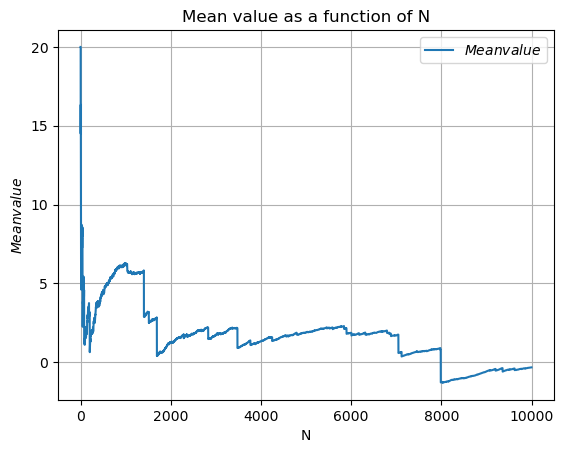

In [108]:
BET = 20
MAX_ROUNDS = 25
MAX_PAYOUT = 10000000
GAME_LIMIT = 10000

# Generate x values and y values
x_values = np.array(range(0, GAME_LIMIT))
y_values = np.array(simulate_st_petersburg(MAX_PAYOUT, BET, MAX_ROUNDS, GAME_LIMIT))

# Plot the function
plt.plot(x_values, y_values, label='$Mean value$')
plt.title('Mean value as a function of N')
plt.xlabel('N')
plt.ylabel('$Mean value$')
plt.grid(True)
plt.legend()
plt.show()

**d. Discuss the convergence over time of your simulation. What value do you expect your simulation to converge to at large times? Can you give a mathematical explanation for this value (voluntary exercise)?**

The simulation will converge if and only if max_round >= bet. Otherwise, if will diverge to infinity.